<a href="https://colab.research.google.com/github/HamdanXI/nlp_adventure/blob/main/gsrc/final_data_analyze_Feb27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 42.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import pandas as pd
import spacy
from spacy import displacy
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter

nlp = spacy.load("en_core_web_sm")

In [66]:
def load_text_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.read().splitlines()
    return pd.DataFrame(lines, columns=['text'])

def prepare_data(gloss_path, text_path):
  asl_df = load_text_file(gloss_path)
  text_df = load_text_file(text_path)
  asl_df.columns = ['gloss']
  df = pd.concat([text_df, asl_df], axis=1)
  # Strip spaces from the start and end of each sentence in the 'text' column
  df['text'] = df['text'].apply(lambda x: x.strip() if pd.notnull(x) else '')
  # Strip spaces from the start and end of each sentence in the 'gloss' column
  df['gloss'] = df['gloss'].apply(lambda x: x.strip() if pd.notnull(x) else '')
  return df

def difference_between_gloss_and_text_count(df):
  df['text_count'] = df['text'].apply(lambda x: len(x.split()))
  df['gloss_count'] = df['gloss'].apply(lambda x: len(x.split()))
  df['count_difference'] = df['text_count'] - df['gloss_count']
  average_difference = df['count_difference'].mean()
  plt.figure(figsize=(10, 6))
  plt.hist(df['count_difference'], bins=range(int(min(df['count_difference'])), int(max(df['count_difference'])) + 1, 1), alpha=0.7, color='skyblue', edgecolor='black')
  plt.xlabel('Difference Between Gloss Count and Text Count')
  plt.ylabel('Number of Sentences')
  plt.title('Distribution of Difference Between Gloss Count and Text Count')
  plt.xticks(range(int(min(df['count_difference'])), int(max(df['count_difference'])) + 2, 1))
  plt.grid(axis='y', linestyle='--')
  plt.show()

def analyze_complexity(text):
    doc = nlp(text)
    num_sentences = len(list(doc.sents))
    num_tokens = len(doc)
    pos_counts = Counter(token.pos_ for token in doc)
    return num_sentences, num_tokens, dict(pos_counts)

def compare_complexity(df):
  df['text_complexity'] = df['text'].apply(analyze_complexity)
  df['gloss_complexity'] = df['gloss'].apply(analyze_complexity)
  text_complexity_columns = df['text_complexity'].apply(pd.Series)
  text_complexity_columns.columns = ['text_num_sentences', 'text_num_tokens', 'text_pos_counts']
  gloss_complexity_columns = df['gloss_complexity'].apply(pd.Series)
  gloss_complexity_columns.columns = ['gloss_num_sentences', 'gloss_num_tokens', 'gloss_pos_counts']
  df = pd.concat([df, text_complexity_columns, gloss_complexity_columns], axis=1)
  df.drop(['text_complexity', 'gloss_complexity'], axis=1, inplace=True)
  average_text_tokens = df['text_num_tokens'].mean()
  average_gloss_tokens = df['gloss_num_tokens'].mean()
  categories = ['Text', 'Gloss']
  averages = [average_text_tokens, average_gloss_tokens]
  plt.figure(figsize=(10, 6))
  plt.bar(categories, averages, color=['blue', 'green'])
  plt.xlabel('Category')
  plt.ylabel('Average Number of Tokens')
  plt.title('Comparison of Average Number of Tokens')
  plt.xticks(categories)
  plt.ylim(0, max(averages) + 5)
  for i, value in enumerate(averages):
    plt.text(i, value + 1, f"{value:.2f}", ha='center')
  plt.show()

  text_pos_aggregate = defaultdict(int)
  gloss_pos_aggregate = defaultdict(int)

  for row in df.itertuples():
    for pos, count in row.text_pos_counts.items():
        text_pos_aggregate[pos] += count
    for pos, count in row.gloss_pos_counts.items():
        gloss_pos_aggregate[pos] += count

  pos_comparison_df = pd.DataFrame([text_pos_aggregate, gloss_pos_aggregate], index=['Text', 'Gloss']).T

  pos_comparison_df.plot(kind='bar', figsize=(14, 7), width=0.8)
  plt.title('Comparison of POS Tags between Text and Gloss')
  plt.xlabel('POS Tags')
  plt.ylabel('Counts')
  plt.xticks(rotation=45)
  plt.legend(title='Source')
  plt.grid(axis='y', linestyle='--')
  plt.tight_layout()

  plt.show()

  return pos_comparison_df

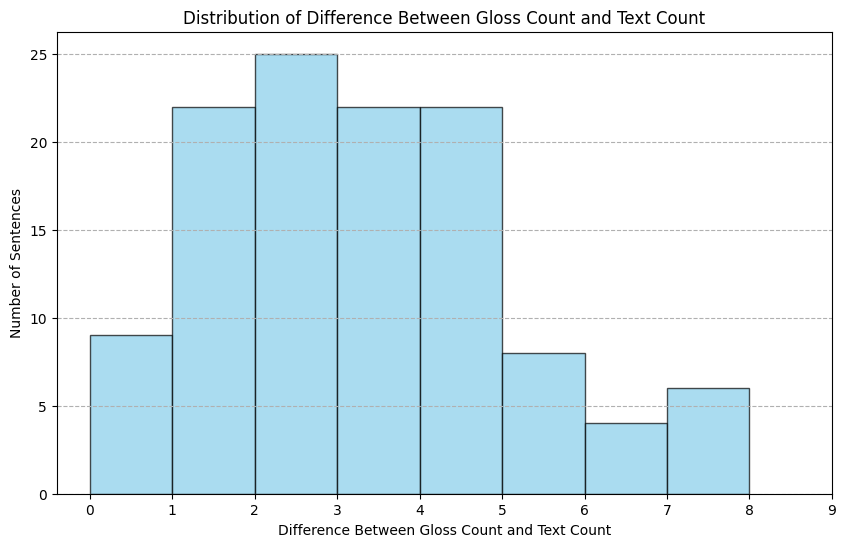

In [62]:
df_aslg = prepare_data('aslg_118_gloss.txt', 'aslg_118_text.txt')
difference_between_gloss_and_text_count(df_aslg)

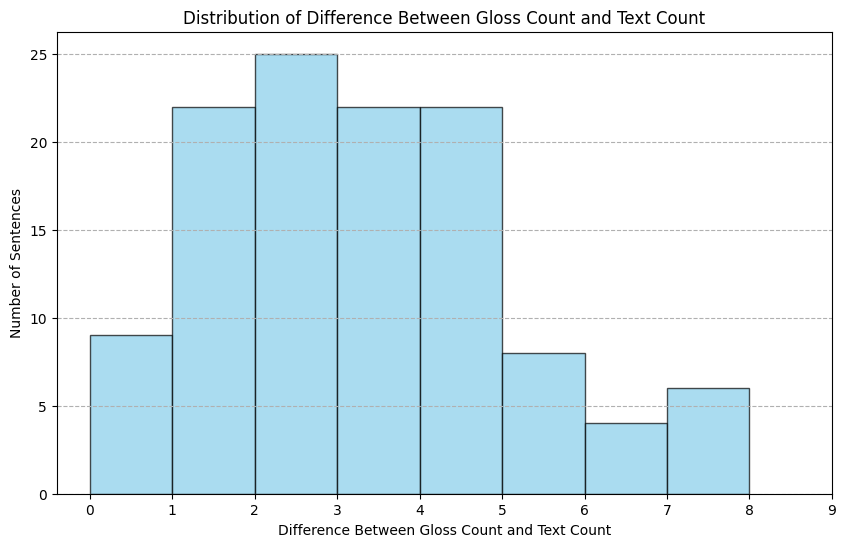

In [77]:
df_aslg_1 = prepare_data('corpus_0001.clean.asl.txt', 'corpus_0001.clean.en.txt')
difference_between_gloss_and_text_count(df_aslg)

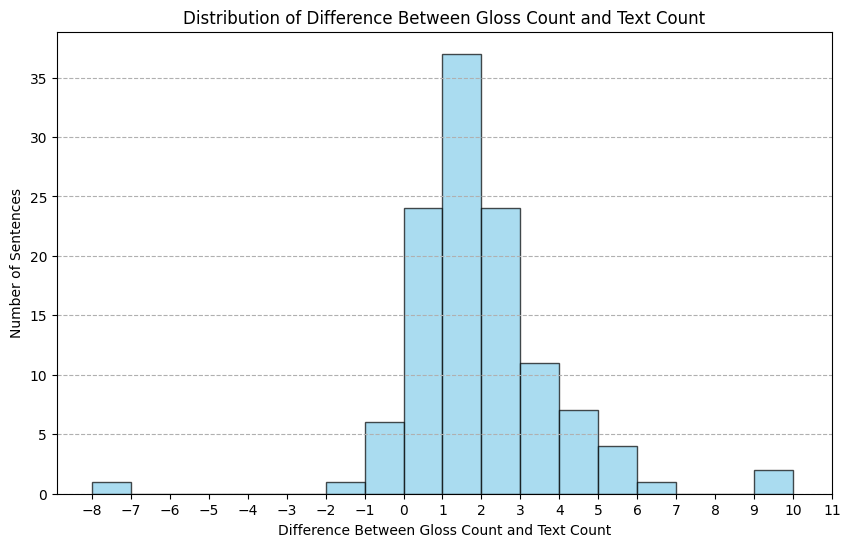

In [63]:
df_selfmade = prepare_data('gloss.txt', 'text.txt')
difference_between_gloss_and_text_count(df_selfmade)

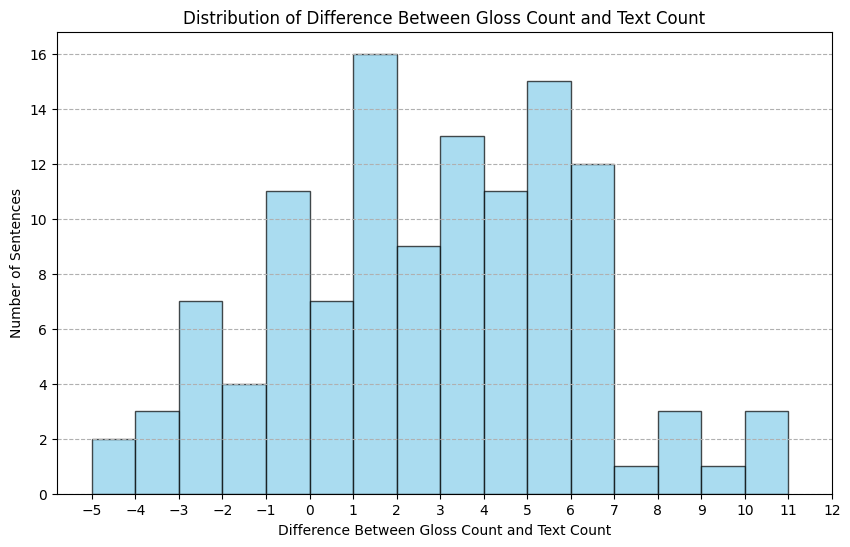

In [64]:
df_pheonix = prepare_data('pheonix_gloss.txt', 'pheonix_text.txt')
difference_between_gloss_and_text_count(df_pheonix)

In [8]:
# Print Sentence Difference Row

sentences_diff_minus = df_selfmade[df_selfmade['count_difference'] == -8]

for index, row in sentences_diff_minus.iterrows():
    print(f"Row {index}: {row['text']}")
    print(f"Row {index}: {row['gloss']}")

Row 111: I looked at the message.
Row 111: MESSAGE (CL: closed 5, Non-Dominant hand, act like looking at text on phone)


## Comparing Text and Gloss Complexity

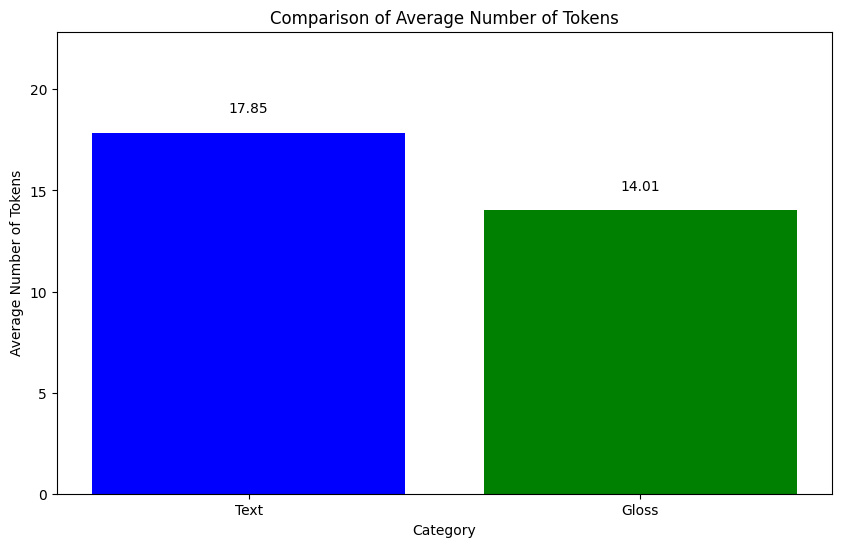

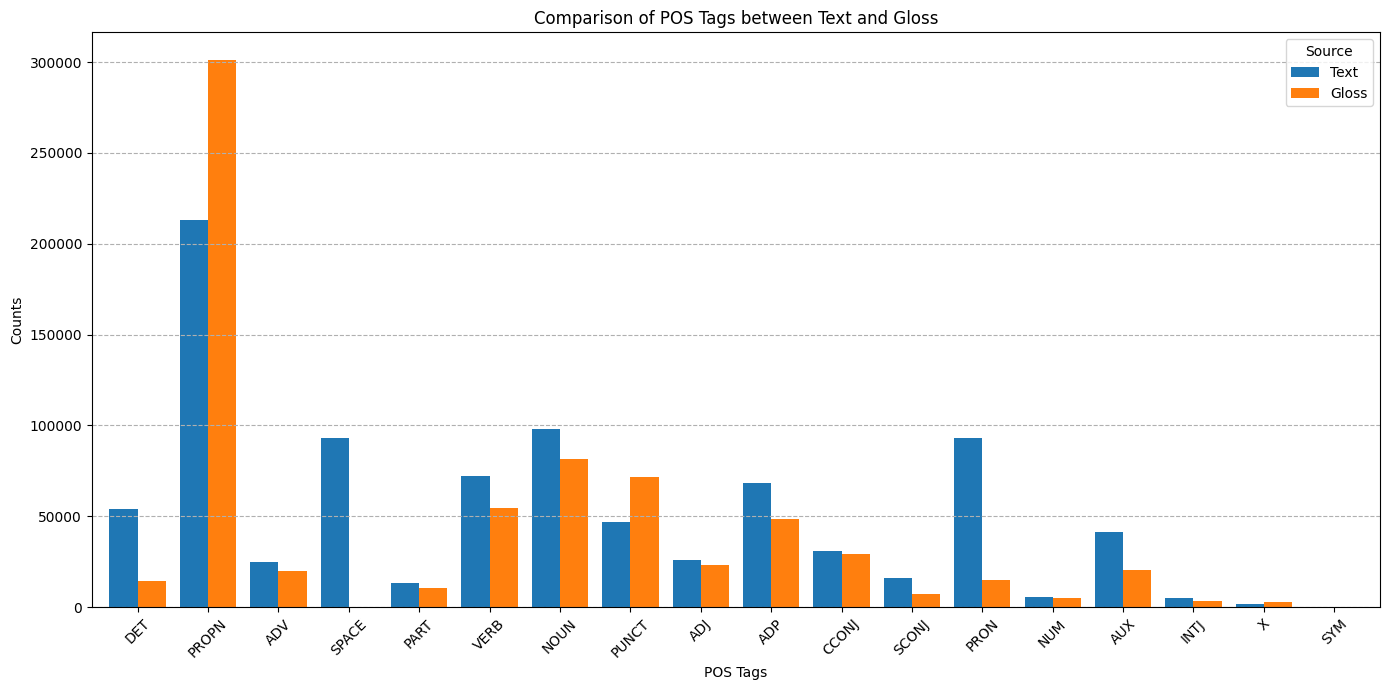

,Text,Gloss
DET,53936.0,14555.0
PROPN,213156.0,301339.0
ADV,24958.0,20082.0
SPACE,93299.0,NaN
PART,13232.0,10341.0
VERB,72362.0,54347.0
NOUN,98325.0,81721.0
PUNCT,46787.0,71857.0
ADJ,25848.0,22979.0
ADP,68545.0,48687.0


In [78]:
compare_complexity(df_aslg_1)

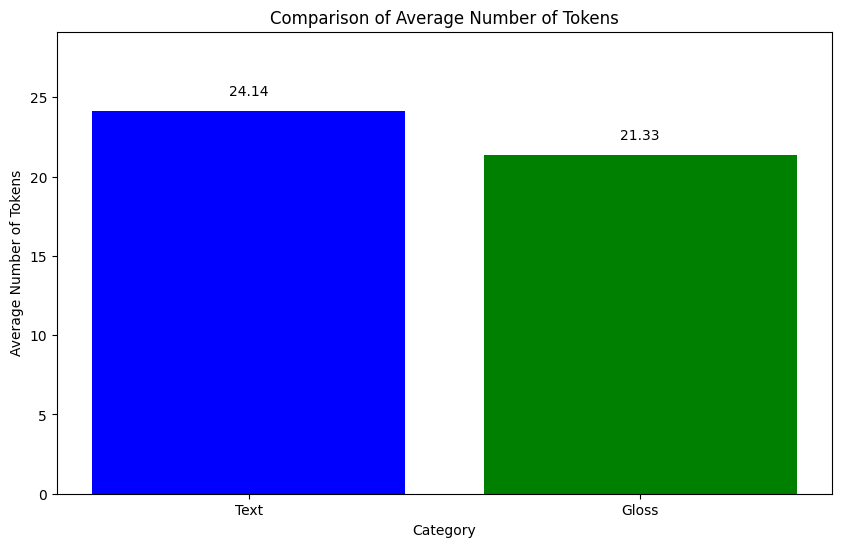

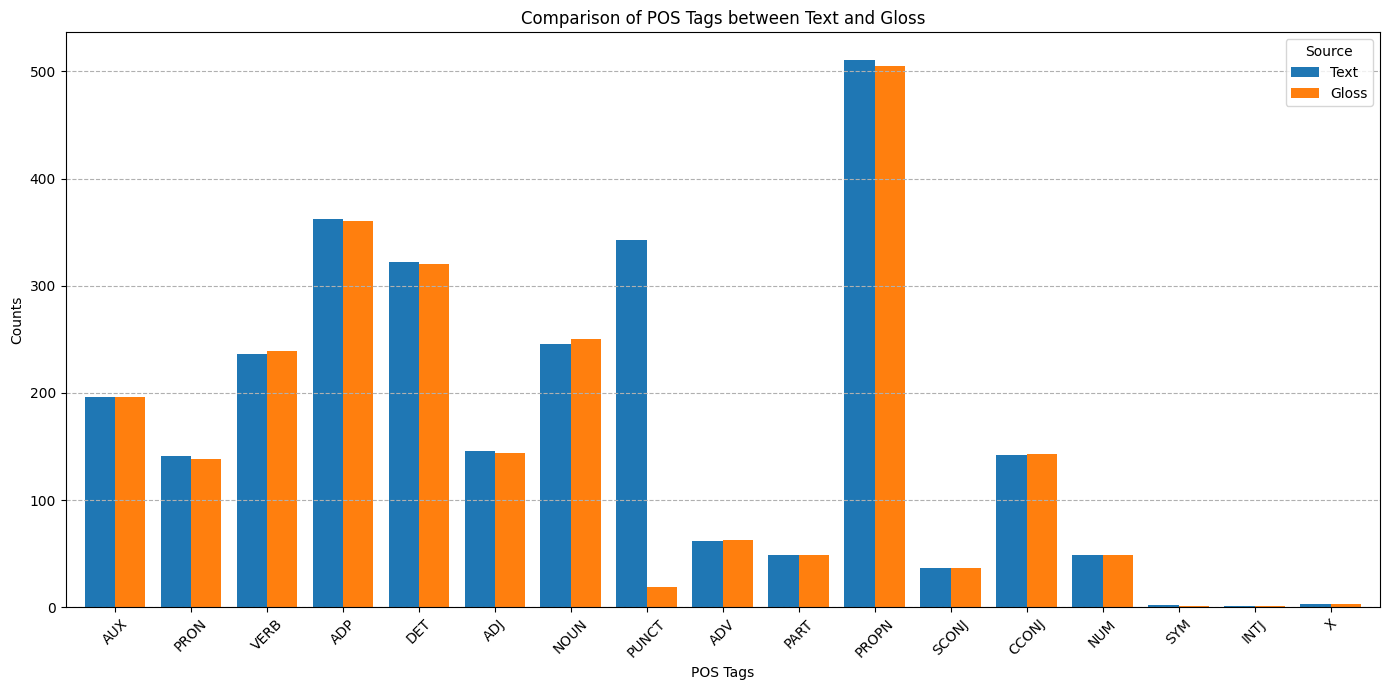

In [67]:
pos_tag_comparision_aslg = compare_complexity(df_aslg)

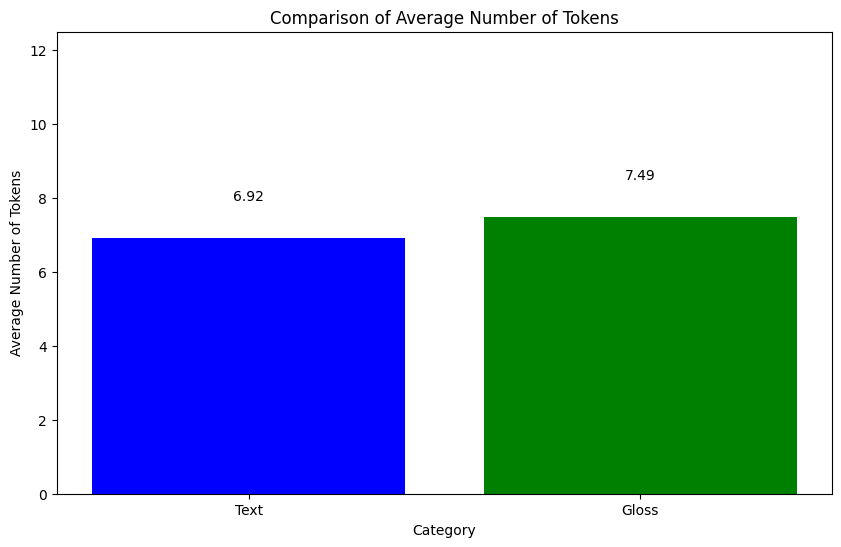

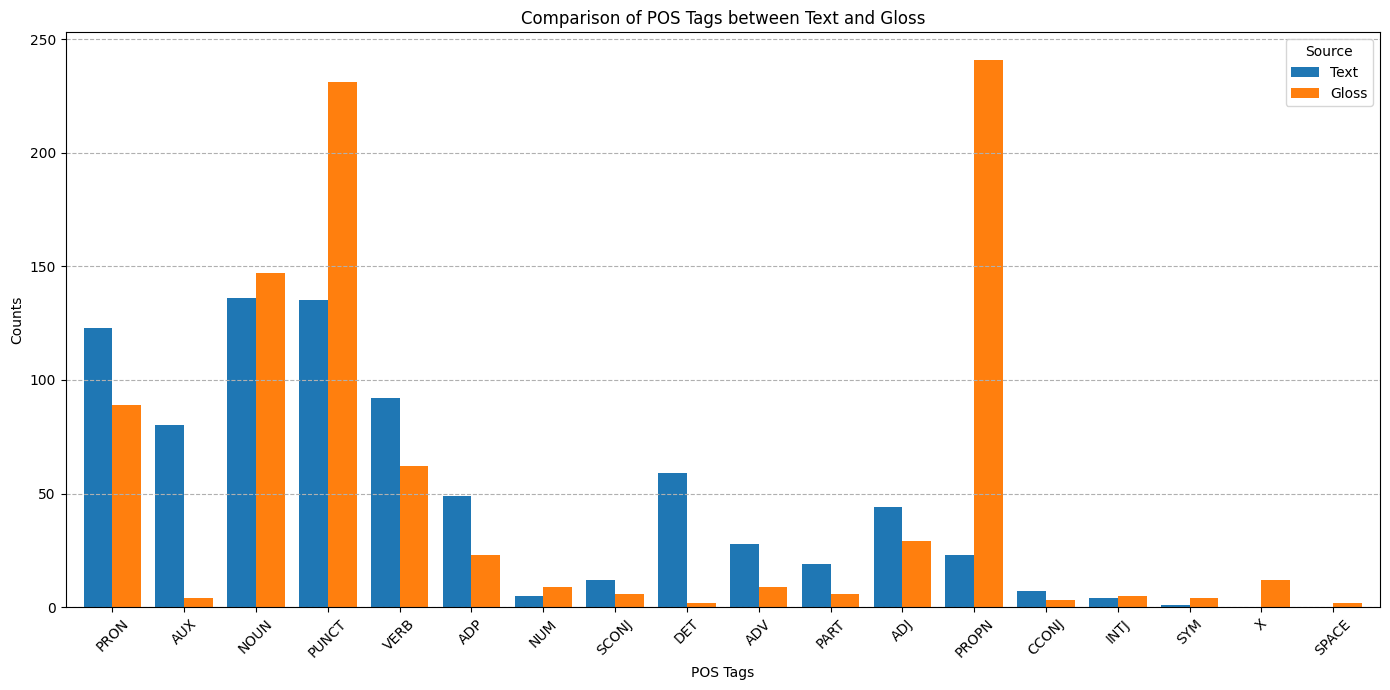

In [69]:
pos_tag_comparision_selfmade = compare_complexity(df_selfmade)

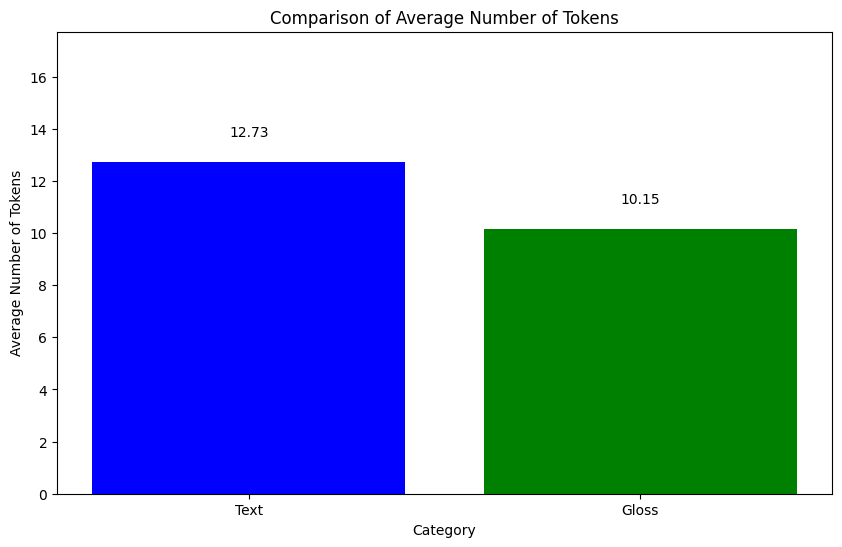

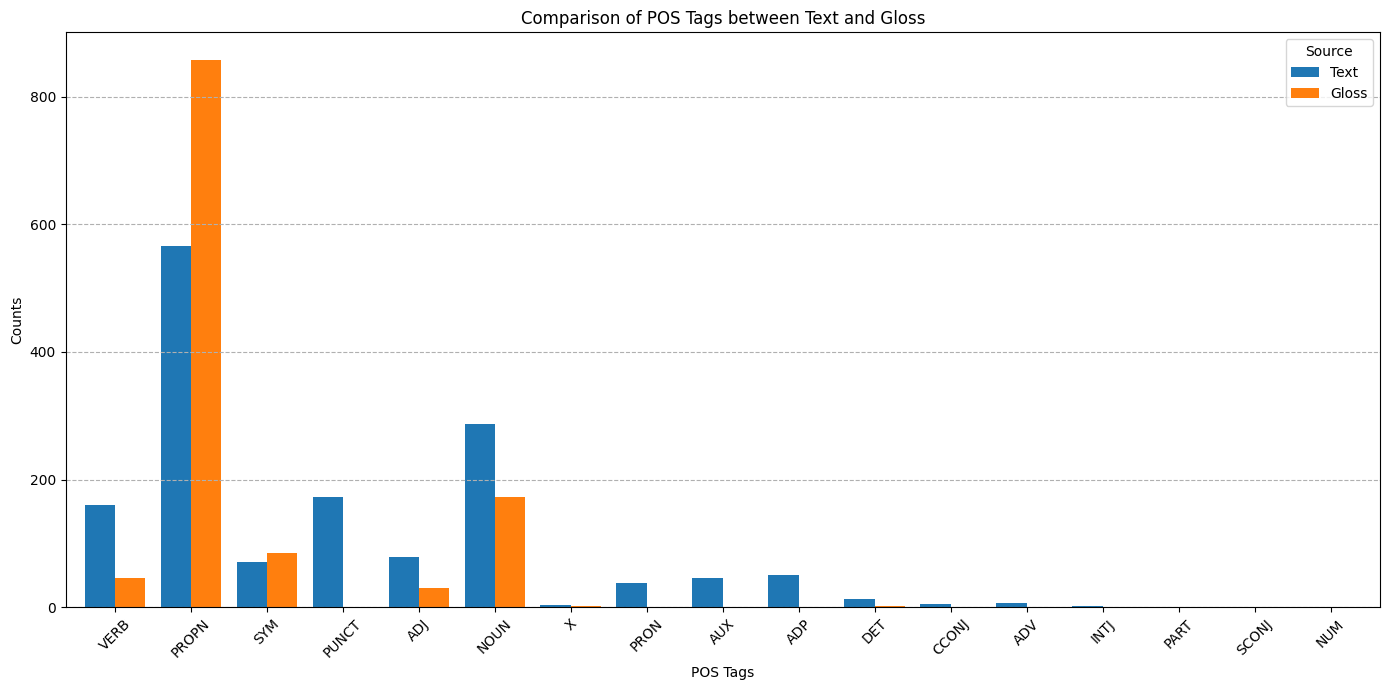

In [70]:
pos_tag_comparision_pheonix = compare_complexity(df_pheonix)

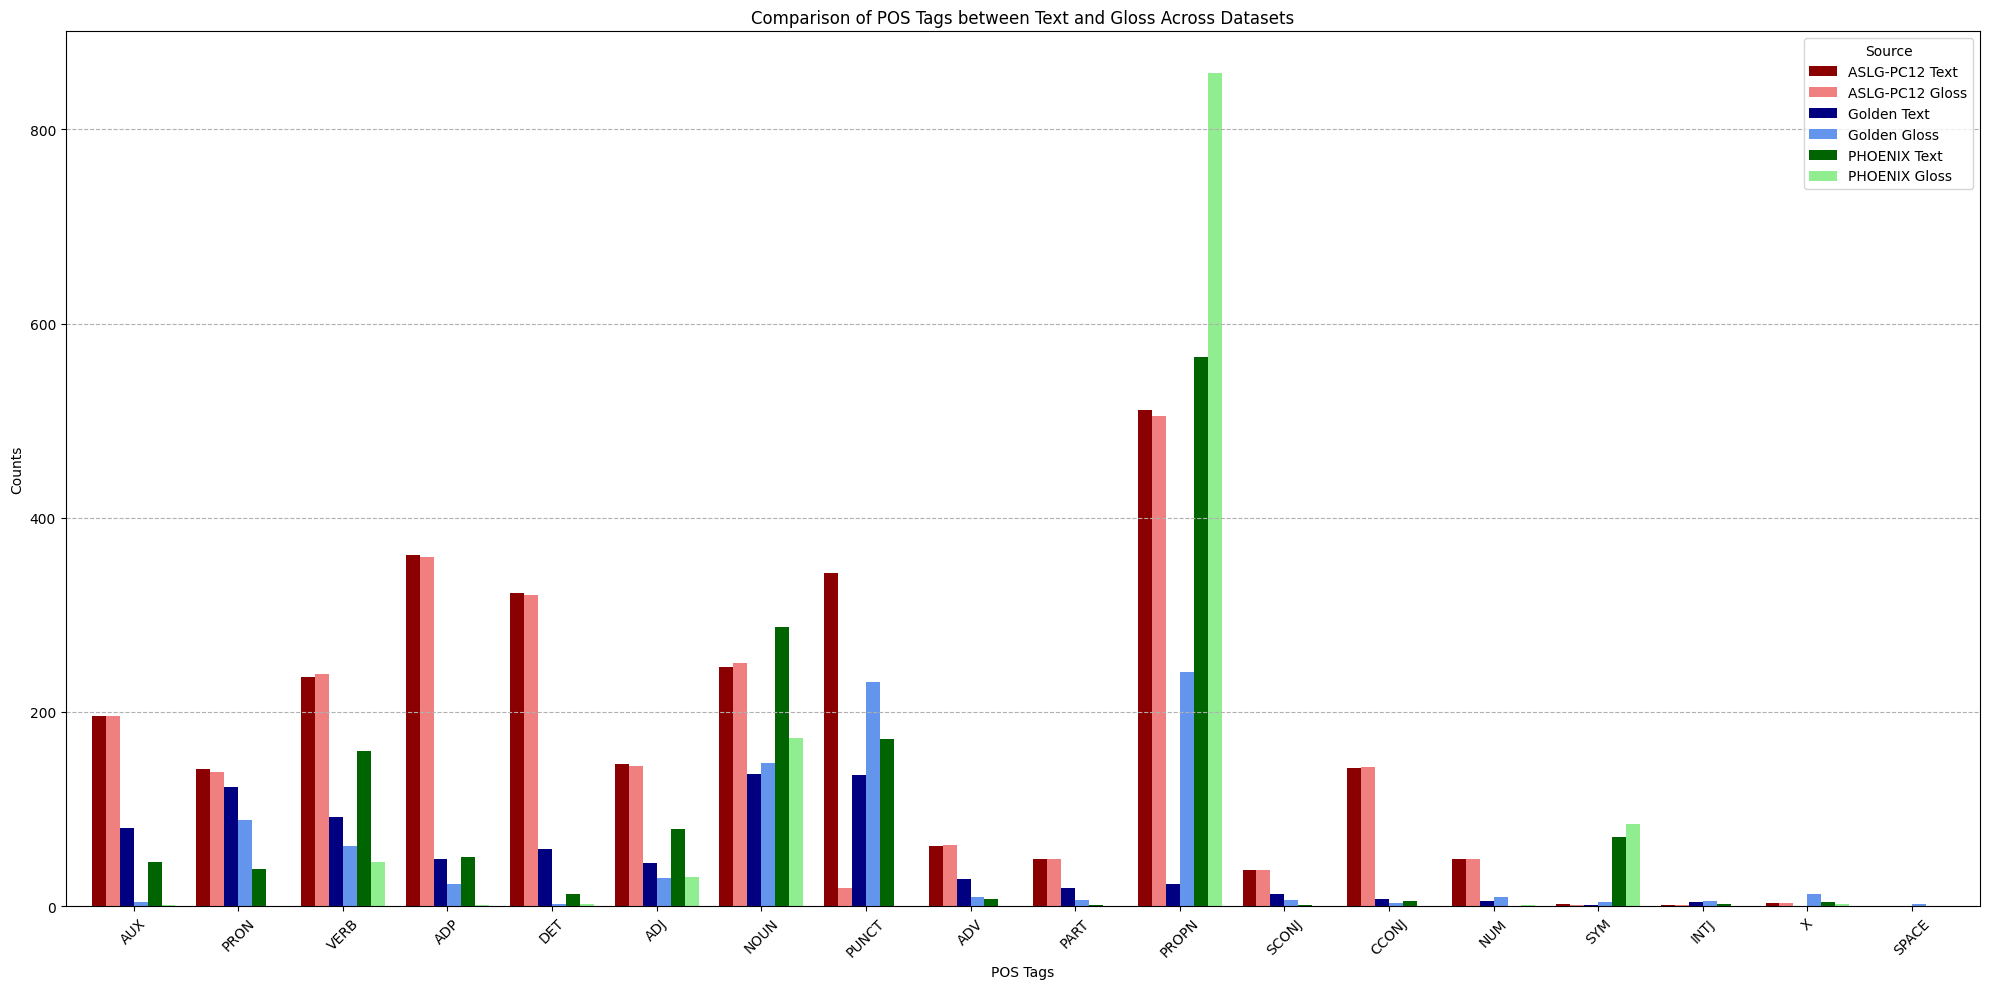

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

combined_df = pd.concat([pos_tag_comparision_aslg, pos_tag_comparision_selfmade, pos_tag_comparision_pheonix], axis=1)

# If the DataFrames don't have the same POS tags, you might need to fill NaN values with zeros
combined_df = combined_df.fillna(0)

combined_df.columns = ['ASLG-PC12 Text', 'ASLG-PC12 Gloss', 'Golden Text', 'Golden Gloss', 'PHOENIX Text', 'PHOENIX Gloss']

colors = ['darkred', 'lightcoral', 'navy', 'cornflowerblue', 'darkgreen', 'lightgreen']

ax = combined_df.plot(kind='bar', figsize=(20, 10), width=0.8, color=colors)

plt.title('Comparison of POS Tags between Text and Gloss Across Datasets')
plt.xlabel('POS Tags')
plt.ylabel('Counts')

plt.xticks(rotation=45)

# Adding a legend to specify the datasets
plt.legend(title='Source')

# Adding grid lines for readability
plt.grid(axis='y', linestyle='--')

# Adjusting layout to prevent clipping of tick-labels
plt.tight_layout()

# Display the plot
plt.show()